In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly

import sys
sys.path.append('/code/src/')
from my_functions import train_test_time_series, evaluate_forecast, load_dataframe_from_csv, split_train_test_data, build_evaluate_sarima_model, select_best_exogenous_variable, plot_time_series

/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from prophet import Prophet

00:01:17 - cmdstanpy - INFO - Chain [1] start processing
00:01:17 - cmdstanpy - INFO - Chain [1] done processing


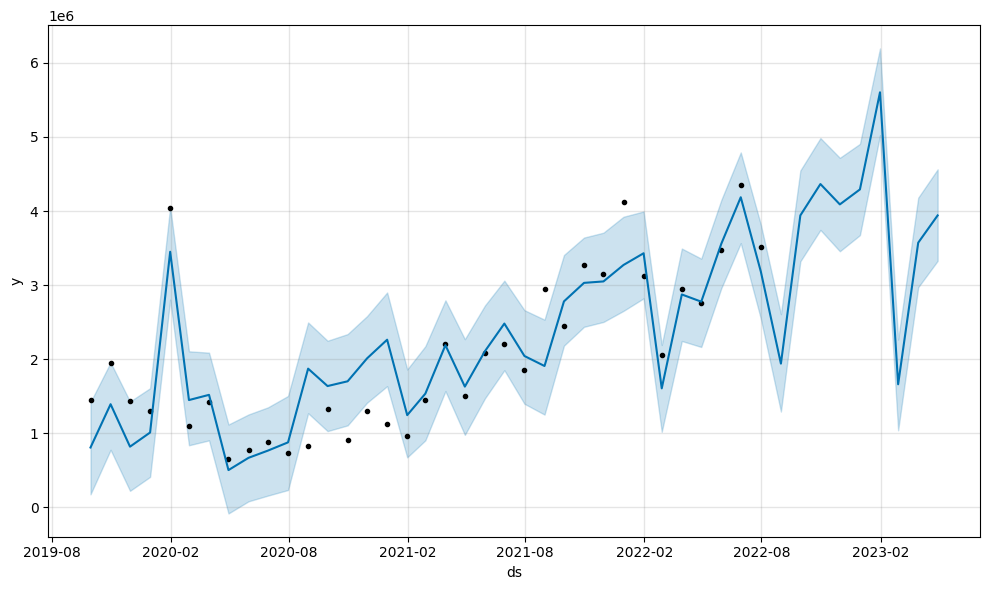

╒══════════════════════════════════════════════════╤════════════════════════╕
│ Metric                                           │ Value                  │
╞══════════════════════════════════════════════════╪════════════════════════╡
│ **Scale-Dependent Metrics**                      │                        │
├──────────────────────────────────────────────────┼────────────────────────┤
│ Mean Squared Error (MSE):                        │ $ 1.604.198.671.723,84 │
├──────────────────────────────────────────────────┼────────────────────────┤
│ Mean Absolute Error (MAE):                       │ $ 1.047.683,53         │
├──────────────────────────────────────────────────┼────────────────────────┤
│ Root Mean Squared Error (RMSE):                  │ $ 1.266.569,65         │
├──────────────────────────────────────────────────┼────────────────────────┤
│ **Percentage-Error Metrics**                     │                        │
├──────────────────────────────────────────────────┼────────────

In [12]:
def plot_predictions(predictions, model):
    model.plot(predictions)
    plt.show()
def forecast_prophet_model(model, test_X, exogenous_vars):
    future_dates = model.make_future_dataframe(periods=len(test_X), freq='M')
    if exogenous_vars is not None:
        future_dates = pd.concat([future_dates, exogenous_vars], axis=1)
    predictions = model.predict(future_dates)
    return predictions  

def fit_prophet_model(train_data, exogenous_vars=None):
    model = Prophet()
    if exogenous_vars is not None:
        exogenous_columns = exogenous_vars.columns
        for column in exogenous_columns:
            model.add_regressor(column)
        
        model.fit(train_data)
    else:
        model.fit(train_data)
    return model
    
def main():
    path_load = "../../data/"
    file_name = "processed/df_time_monthly.csv"
    full_path = path_load + file_name
    data = pd.read_csv(full_path, parse_dates=True)
    data.index.freq = 'M'
    exogenous_vars = data.drop(['cost', 'date'], axis=1)  # Variables exógenas
    # Renombrar las columnas a "ds" y "y"
    data = data.rename(columns={"date": "ds", "cost": "y"})
    
    # Asegurar que la columna "ds" sea de tipo datetime
    data["ds"] = pd.to_datetime(data["ds"])
    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_X, train_y, test_X, test_y = split_train_test_data(data, 'y')
    # Crear una instancia del modelo Prophet
    train_data = pd.concat([train_X, train_y], axis=1)
    model = fit_prophet_model(train_data, exogenous_vars)
    predictions = forecast_prophet_model(model, test_X, exogenous_vars)
    
    plot_predictions(predictions, model)
    metrics = evaluate_forecast(test_y, predictions['yhat'][-len(test_y):])
if __name__ == "__main__":
    main()

In [ ]:
# sin variables exógenas daba:
# ╒══════════════════════════════════════════════════╤════════════════════════╕
# │ Metric                                           │ Value                  │
# ╞══════════════════════════════════════════════════╪════════════════════════╡
# │ **Scale-Dependent Metrics**                      │                        │
# ├──────────────────────────────────────────────────┼────────────────────────┤
# │ Mean Squared Error (MSE):                        │ $ 1.604.198.671.723,84 │
# ├──────────────────────────────────────────────────┼────────────────────────┤
# │ Mean Absolute Error (MAE):                       │ $ 1.047.683,53         │
# ├──────────────────────────────────────────────────┼────────────────────────┤
# │ Root Mean Squared Error (RMSE):                  │ $ 1.266.569,65         │
# ├──────────────────────────────────────────────────┼────────────────────────┤
# │ **Percentage-Error Metrics**                     │                        │
# ├──────────────────────────────────────────────────┼────────────────────────┤
# │ Mean Absolute percentage Error (MAPE)            │ 32.68%                 │
# ├──────────────────────────────────────────────────┼────────────────────────┤
# │ Symmetric Mean Absolute percentage Error (SMAPE) │ 30.56%                 │
# ╘══════════════════════════════════════════════════╧════════════════════════╛

# COn varaibles exógenas dió muy similar No mejoró
# ╒══════════════════════════════════════════════════╤════════════════════════╕
# │ Metric                                           │ Value                  │
# ╞══════════════════════════════════════════════════╪════════════════════════╡
# │ **Scale-Dependent Metrics**                      │                        │
# ├──────────────────────────────────────────────────┼────────────────────────┤
# │ Mean Squared Error (MSE):                        │ $ 1.888.138.143.977,01 │
# ├──────────────────────────────────────────────────┼────────────────────────┤
# │ Mean Absolute Error (MAE):                       │ $ 1.080.392,15         │
# ├──────────────────────────────────────────────────┼────────────────────────┤
# │ Root Mean Squared Error (RMSE):                  │ $ 1.374.095,39         │
# ├──────────────────────────────────────────────────┼────────────────────────┤
# │ **Percentage-Error Metrics**                     │                        │
# ├──────────────────────────────────────────────────┼────────────────────────┤
# │ Mean Absolute percentage Error (MAPE)            │ 34.58%                 │
# ├──────────────────────────────────────────────────┼────────────────────────┤
# │ Symmetric Mean Absolute percentage Error (SMAPE) │ 30.97%                 │
# ╘══════════════════════════════════════════════════╧════════════════════════╛